# **CODING DOJO: ONU Sustainability of Countries**
## Creado por: David Romero

* Fecha creado: 09/04/2023
* Fecha de actualización: 23/04/2023
* Descripción: Proyecto 2

In [18]:
# Imports
import numpy as np
import pandas as pd
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer

# Graphics
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
pd.set_option('mode.chained_assignment', None)

from sklearn.model_selection import train_test_split

In [19]:
df = pd.read_csv('~/Developer/gdrive/CodingDojo/Week8/Assignments/unsdg_2002_2021.csv')
df.head()

,dt_year,dt_date,country,region,level_of_development,greenhousegas_emissione_mtco2equivalent,total_government_revenue_proportion_of_gdp_perc,fdi_inflows_millionusd,annual_growth_rate_perc,proportion_of_population_with_primary_reliance_on_clean_fuels_a,mortality_rate_perc,renewable_energy_share_on_the_total_energy_consumption,co2emissions_from_fuel_combustion_in_millions_of_tonnes,fossilfuel_subsidies_consumption_and_production_billionusd,randd_expenditure_proportionofgdp_perc,national_action_plans_as_priority_national_policies,number_of_companies_publishing_sustainability_reports,education_for_sustainable_development,enhance_policy_coherence_for_sustainable_development,land_degraded_over_total_land_area
0,2002,2002-01-01,Afghanistan,Central and Southern Asia,Least Developed,NaN,NaN,0.68,0.420344,8.0,NaN,37.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003,2003-01-01,Afghanistan,Central and Southern Asia,Least Developed,NaN,0.120955,50.00,0.105249,9.0,NaN,36.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004,2004-01-01,Afghanistan,Central and Southern Asia,Least Developed,NaN,0.176214,57.80,-0.014901,11.0,NaN,44.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,2005-01-01,Afghanistan,Central and Southern Asia,Least Developed,19.32802,0.180929,186.90,0.036212,12.0,0.409,33.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006,2006-01-01,Afghanistan,Central and Southern Asia,Least Developed,NaN,0.302234,271.00,0.053648,14.0,NaN,31.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Creates a report of missing values
def missing_values(df):
    missing_values = pd.DataFrame(100*df.isna().sum()/df.shape[0], columns=['Missing %']).sort_values(by='Missing %', ascending=False)
    missing_values['# Missing'] = df.isna().sum() 
    return missing_values

In [21]:
# Creates a bar plot of countries by the top value of a feature.
def bar_plot_feature(df, feature, units):
    plt.figure(figsize=(10,6));
    largest = df.nlargest(5, feature)
    largest = pd.concat([largest, df.loc[df['country']=='Ecuador']])
    colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
    y_pos = np.arange(len(largest))
    plt.bar(y_pos, largest[feature],color=colors, alpha=.9)
    plt.ylabel(units,fontsize=16);
    plt.xlabel('Country',fontsize=16);
    plt.xticks(y_pos, largest['country'], rotation=90),
    plt.title(feature.upper().replace('_',' '), fontsize=16);

In [22]:
# Find outliers
# Source: https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [23]:
# Fix data type
df['dt_date'] = pd.to_datetime(df['dt_date'])

In [24]:
# Sort by date
df = df.sort_values('dt_date')

In [25]:
# Remove rows that won't be used
df = df.loc[df['level_of_development']!='Not Specified']
df.shape

(3376, 20)

In [26]:
missing_values(df)

,Missing %,# Missing
enhance_policy_coherence_for_sustainable_development,99.289100,3352
national_action_plans_as_priority_national_policies,97.630332,3296
land_degraded_over_total_land_area,96.563981,3260
education_for_sustainable_development,95.142180,3212
number_of_companies_publishing_sustainability_reports,90.402844,3052
mortality_rate_perc,80.568720,2720
fossilfuel_subsidies_consumption_and_production_billionusd,71.001185,2397
greenhousegas_emissione_mtco2equivalent,67.357820,2274
randd_expenditure_proportionofgdp_perc,56.546209,1909
total_government_revenue_proportion_of_gdp_perc,31.605450,1067


Too many missing values are present in the dataset, and imputing them is not feasible. Some variables have only one reported value, while others are reported every 5 years, making it impossible to estimate the missing values accurately.

In [27]:
# Check if any country has changed its level of development
changed_level_of_development = pd.DataFrame(df.groupby('country')['level_of_development'].value_counts(normalize=True))
print(changed_level_of_development.head())
print('Number of countries that changed their level of development',(changed_level_of_development < 1).sum())

                                     level_of_development
country     level_of_development                         
Afghanistan Least Developed                           1.0
Albania     Economies in Transition                   1.0
Algeria     Developing Economies                      1.0
Angola      Least Developed                           1.0
Argentina   Developing Economies                      1.0
Number of countries that changed their level of development level_of_development    0
dtype: int64


No country has changed its level of development in 20 years.

In [28]:
# Group by country and take the latest value available
latest_values = df.groupby('country').last().reset_index()
latest_values

,country,dt_year,dt_date,region,level_of_development,greenhousegas_emissione_mtco2equivalent,total_government_revenue_proportion_of_gdp_perc,fdi_inflows_millionusd,annual_growth_rate_perc,proportion_of_population_with_primary_reliance_on_clean_fuels_a,mortality_rate_perc,renewable_energy_share_on_the_total_energy_consumption,co2emissions_from_fuel_combustion_in_millions_of_tonnes,fossilfuel_subsidies_consumption_and_production_billionusd,randd_expenditure_proportionofgdp_perc,national_action_plans_as_priority_national_policies,number_of_companies_publishing_sustainability_reports,education_for_sustainable_development,enhance_policy_coherence_for_sustainable_development,land_degraded_over_total_land_area
0,Afghanistan,2021,2021-01-01,Central and Southern Asia,Least Developed,43.37700,0.452478,38.53333,-0.041682,33.0,0.353,18.51,NaN,0.06024,NaN,NaN,NaN,0.000,NaN,8.0
1,Albania,2021,2021-01-01,Europe and North America,Economies in Transition,8.12570,0.264761,1287.97818,-0.032064,81.0,0.114,40.20,4.05,0.00000,0.001541,1.0,NaN,0.719,NaN,8.0
2,Algeria,2021,2021-01-01,North Africa and Western Asia,Developing Economies,NaN,0.404242,1381.81182,-0.066306,95.0,0.139,0.16,142.37,8.39641,0.005430,NaN,NaN,0.625,NaN,1.0
3,Angola,2021,2021-01-01,Sub-Saharan Africa,Least Developed,61.61076,0.202190,-4098.47875,-0.070799,50.0,0.222,54.69,18.77,1.52039,0.000323,NaN,NaN,0.000,NaN,20.0
4,Argentina,2021,2021-01-01,Latin America and the Caribbean,Developing Economies,338.96335,0.173196,6663.06211,-0.107327,95.0,0.157,10.74,162.22,4.31072,0.004936,1.0,48.0,0.000,NaN,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Venezuela (Bolivarian Republic of),2021,2021-01-01,Latin America and the Caribbean,Developing Economies,NaN,NaN,934.00000,-0.298033,95.0,0.148,15.62,90.09,4.75949,0.003371,NaN,NaN,0.000,NaN,15.0
165,Viet Nam,2021,2021-01-01,Eastern and South Eastern Asia,Developing Economies,278.44186,0.218163,16120.00000,0.019792,65.0,0.212,18.65,282.28,0.27111,0.005267,NaN,4.0,0.000,72.5,31.0
166,Yemen,2021,2021-01-01,North Africa and Western Asia,Least Developed,37.94287,NaN,-282.09833,-0.010497,62.0,0.276,3.11,9.60,0.00040,NaN,1.0,NaN,0.000,NaN,NaN
167,Zambia,2021,2021-01-01,Sub-Saharan Africa,Least Developed,NaN,0.199646,547.96791,-0.055503,10.0,0.246,84.50,5.74,0.18908,0.002782,NaN,NaN,0.000,NaN,7.0


In [29]:
missing_values(latest_values)

,Missing %,# Missing
enhance_policy_coherence_for_sustainable_development,85.798817,145
number_of_companies_publishing_sustainability_reports,57.988166,98
national_action_plans_as_priority_national_policies,52.662722,89
land_degraded_over_total_land_area,31.360947,53
greenhousegas_emissione_mtco2equivalent,28.402367,48
randd_expenditure_proportionofgdp_perc,21.301775,36
co2emissions_from_fuel_combustion_in_millions_of_tonnes,18.934911,32
total_government_revenue_proportion_of_gdp_perc,11.834320,20
proportion_of_population_with_primary_reliance_on_clean_fuels_a,4.142012,7
education_for_sustainable_development,2.958580,5


In [30]:
# Drop columns that won't be used.
latest_values.drop(columns = ['dt_year', 'dt_date', 'region'], inplace=True)

In [31]:
# Drop columns that have too many missing values
latest_values.drop(columns = ['enhance_policy_coherence_for_sustainable_development', 'number_of_companies_publishing_sustainability_reports', 'national_action_plans_as_priority_national_policies'], inplace=True)

In [32]:
missing_values(latest_values)

,Missing %,# Missing
land_degraded_over_total_land_area,31.360947,53
greenhousegas_emissione_mtco2equivalent,28.402367,48
randd_expenditure_proportionofgdp_perc,21.301775,36
co2emissions_from_fuel_combustion_in_millions_of_tonnes,18.934911,32
total_government_revenue_proportion_of_gdp_perc,11.834320,20
proportion_of_population_with_primary_reliance_on_clean_fuels_a,4.142012,7
mortality_rate_perc,2.958580,5
fossilfuel_subsidies_consumption_and_production_billionusd,2.958580,5
education_for_sustainable_development,2.958580,5
fdi_inflows_millionusd,2.366864,4


In [33]:
latest_values

,country,level_of_development,greenhousegas_emissione_mtco2equivalent,total_government_revenue_proportion_of_gdp_perc,fdi_inflows_millionusd,annual_growth_rate_perc,proportion_of_population_with_primary_reliance_on_clean_fuels_a,mortality_rate_perc,renewable_energy_share_on_the_total_energy_consumption,co2emissions_from_fuel_combustion_in_millions_of_tonnes,fossilfuel_subsidies_consumption_and_production_billionusd,randd_expenditure_proportionofgdp_perc,education_for_sustainable_development,land_degraded_over_total_land_area
0,Afghanistan,Least Developed,43.37700,0.452478,38.53333,-0.041682,33.0,0.353,18.51,NaN,0.06024,NaN,0.000,8.0
1,Albania,Economies in Transition,8.12570,0.264761,1287.97818,-0.032064,81.0,0.114,40.20,4.05,0.00000,0.001541,0.719,8.0
2,Algeria,Developing Economies,NaN,0.404242,1381.81182,-0.066306,95.0,0.139,0.16,142.37,8.39641,0.005430,0.625,1.0
3,Angola,Least Developed,61.61076,0.202190,-4098.47875,-0.070799,50.0,0.222,54.69,18.77,1.52039,0.000323,0.000,20.0
4,Argentina,Developing Economies,338.96335,0.173196,6663.06211,-0.107327,95.0,0.157,10.74,162.22,4.31072,0.004936,0.000,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Venezuela (Bolivarian Republic of),Developing Economies,NaN,NaN,934.00000,-0.298033,95.0,0.148,15.62,90.09,4.75949,0.003371,0.000,15.0
165,Viet Nam,Developing Economies,278.44186,0.218163,16120.00000,0.019792,65.0,0.212,18.65,282.28,0.27111,0.005267,0.000,31.0
166,Yemen,Least Developed,37.94287,NaN,-282.09833,-0.010497,62.0,0.276,3.11,9.60,0.00040,NaN,0.000,NaN
167,Zambia,Least Developed,NaN,0.199646,547.96791,-0.055503,10.0,0.246,84.50,5.74,0.18908,0.002782,0.000,7.0


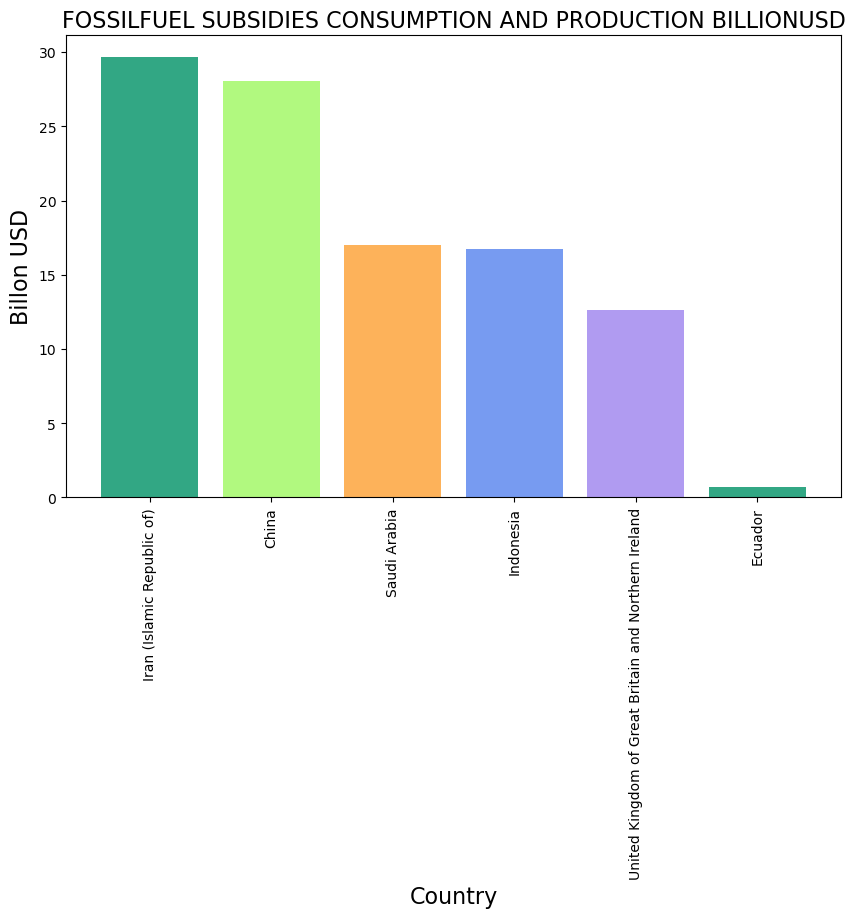

In [34]:
bar_plot_feature(latest_values,'fossilfuel_subsidies_consumption_and_production_billionusd', 'Billon USD')

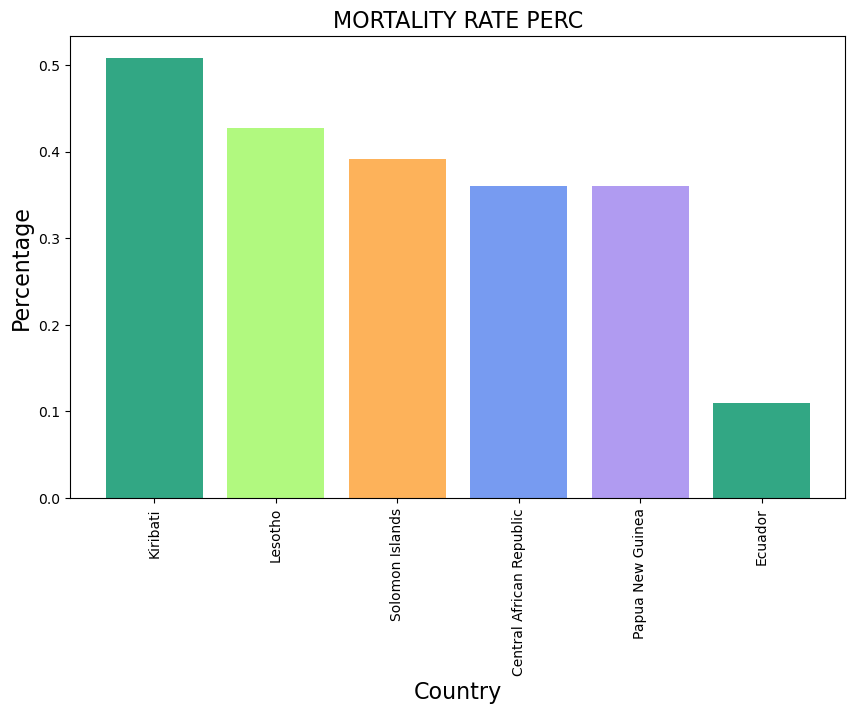

In [35]:
bar_plot_feature(latest_values,'mortality_rate_perc', 'Percentage')

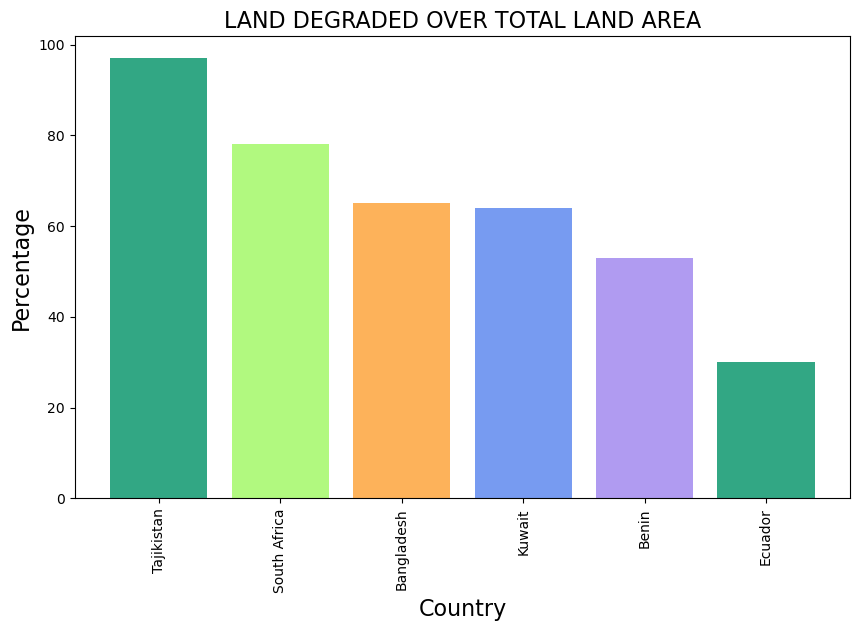

In [36]:
bar_plot_feature(latest_values,'land_degraded_over_total_land_area', 'Percentage')

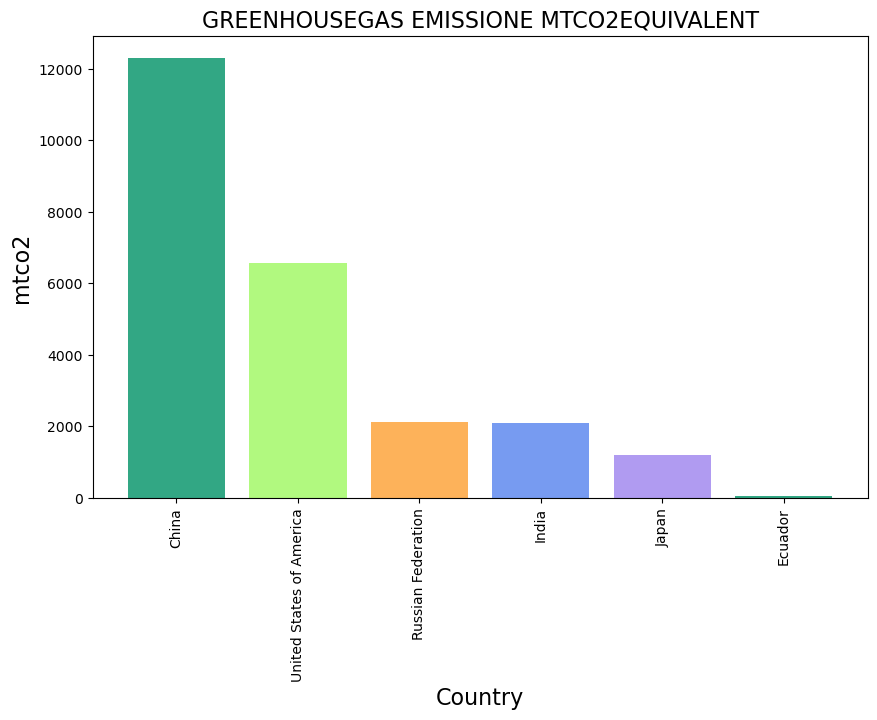

In [37]:
bar_plot_feature(latest_values,'greenhousegas_emissione_mtco2equivalent', 'mtco2')

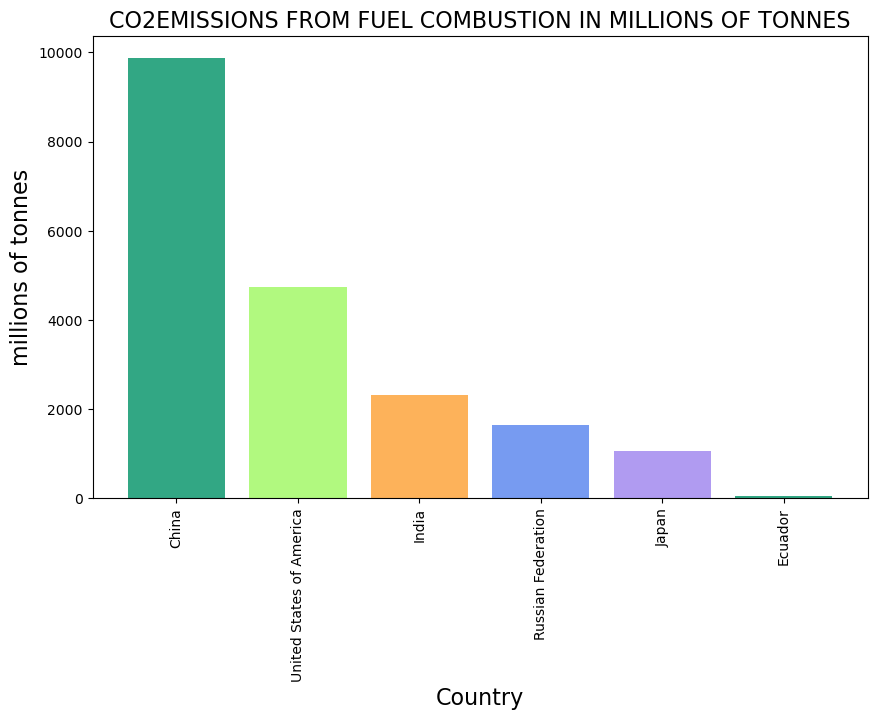

In [38]:
bar_plot_feature(latest_values,'co2emissions_from_fuel_combustion_in_millions_of_tonnes', 'millions of tonnes')

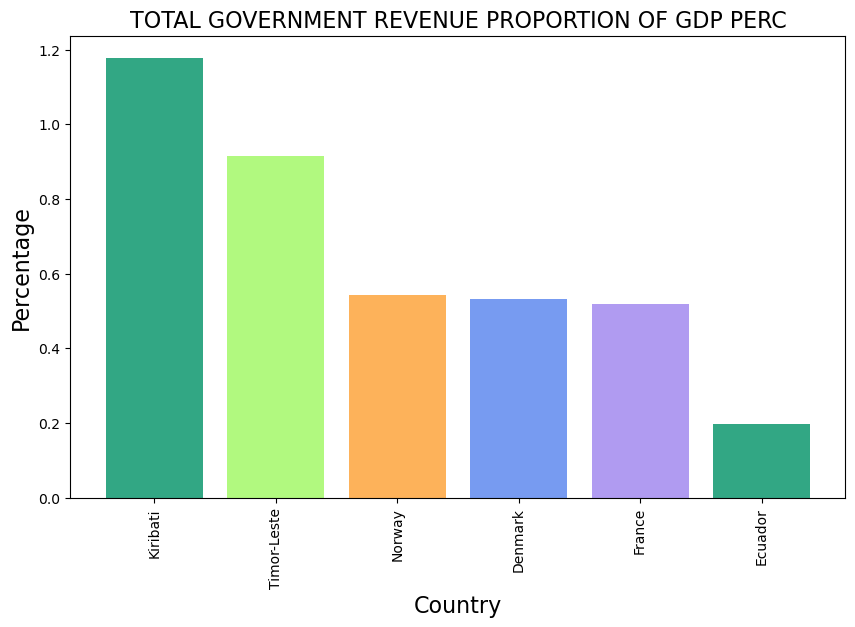

In [39]:
bar_plot_feature(latest_values,'total_government_revenue_proportion_of_gdp_perc', 'Percentage')

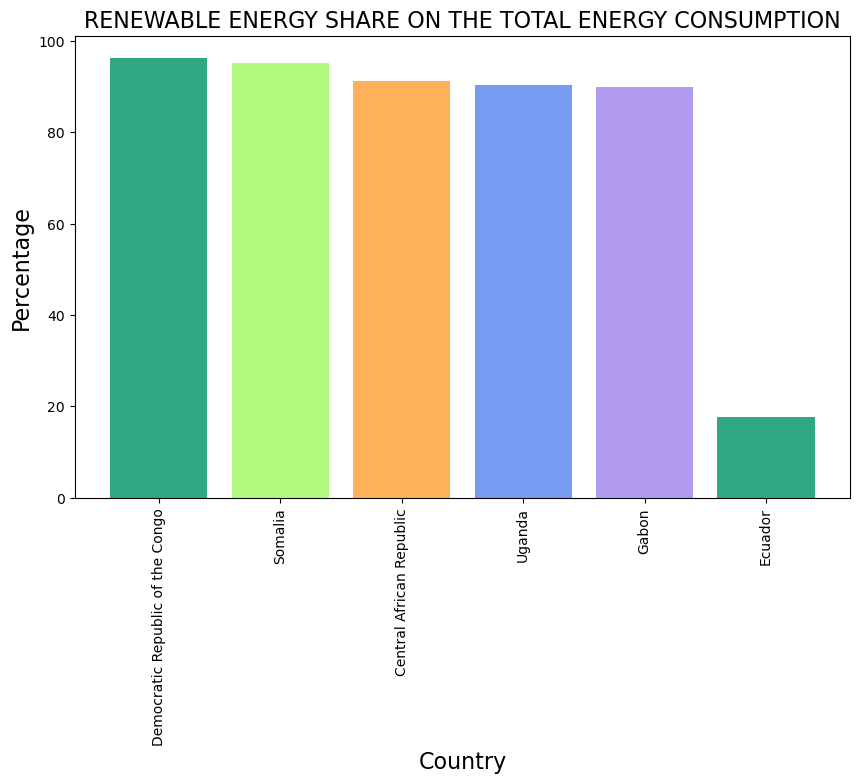

In [40]:
bar_plot_feature(latest_values,'renewable_energy_share_on_the_total_energy_consumption', 'Percentage')

# -identificado los valores atípicos

In [41]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [42]:
header = ['Features', '# Outliers', 'Outliers %', 'Max Value']
print(f'{header[0]:>60s}: {header[1]:>5}  {header[2]:>5} {header[3]:>10}')
for column in df[num_selector].columns:
    outliers = find_outliers_IQR(df[column])
    if len(outliers) > 0:
        print(f'{column:>60s}: {len(outliers):>10}  {len(outliers)/df.shape[0]:>10.3f} {outliers.max():>20}')

                                                    Features: # Outliers  Outliers %  Max Value
                     greenhousegas_emissione_mtco2equivalent:         84       0.025              12300.2
             total_government_revenue_proportion_of_gdp_perc:         23       0.007            3.6563463
                                      fdi_inflows_millionusd:        513       0.152             467625.0
                                     annual_growth_rate_perc:        217       0.064   0.8529264999999999
                                         mortality_rate_perc:          7       0.002                0.545
     co2emissions_from_fuel_combustion_in_millions_of_tonnes:        380       0.113               9876.5
  fossilfuel_subsidies_consumption_and_production_billionusd:        147       0.044             81.62778
                      randd_expenditure_proportionofgdp_perc:         79       0.023            0.0494079
       number_of_companies_publishing_sustainability_rep

In [43]:
import plotly.express as px
corr = latest_values[num_selector].corr()
fig = px.imshow(corr, text_auto=True, aspect='auto')
fig.show()

In [44]:
latest_values

,country,level_of_development,greenhousegas_emissione_mtco2equivalent,total_government_revenue_proportion_of_gdp_perc,fdi_inflows_millionusd,annual_growth_rate_perc,proportion_of_population_with_primary_reliance_on_clean_fuels_a,mortality_rate_perc,renewable_energy_share_on_the_total_energy_consumption,co2emissions_from_fuel_combustion_in_millions_of_tonnes,fossilfuel_subsidies_consumption_and_production_billionusd,randd_expenditure_proportionofgdp_perc,education_for_sustainable_development,land_degraded_over_total_land_area
0,Afghanistan,Least Developed,43.37700,0.452478,38.53333,-0.041682,33.0,0.353,18.51,NaN,0.06024,NaN,0.000,8.0
1,Albania,Economies in Transition,8.12570,0.264761,1287.97818,-0.032064,81.0,0.114,40.20,4.05,0.00000,0.001541,0.719,8.0
2,Algeria,Developing Economies,NaN,0.404242,1381.81182,-0.066306,95.0,0.139,0.16,142.37,8.39641,0.005430,0.625,1.0
3,Angola,Least Developed,61.61076,0.202190,-4098.47875,-0.070799,50.0,0.222,54.69,18.77,1.52039,0.000323,0.000,20.0
4,Argentina,Developing Economies,338.96335,0.173196,6663.06211,-0.107327,95.0,0.157,10.74,162.22,4.31072,0.004936,0.000,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Venezuela (Bolivarian Republic of),Developing Economies,NaN,NaN,934.00000,-0.298033,95.0,0.148,15.62,90.09,4.75949,0.003371,0.000,15.0
165,Viet Nam,Developing Economies,278.44186,0.218163,16120.00000,0.019792,65.0,0.212,18.65,282.28,0.27111,0.005267,0.000,31.0
166,Yemen,Least Developed,37.94287,NaN,-282.09833,-0.010497,62.0,0.276,3.11,9.60,0.00040,NaN,0.000,NaN
167,Zambia,Least Developed,NaN,0.199646,547.96791,-0.055503,10.0,0.246,84.50,5.74,0.18908,0.002782,0.000,7.0


In [45]:
# Encode target class
encoder = LabelEncoder()
encoder.fit(latest_values['level_of_development'])
encoder_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
latest_values['level_of_development_encoded'] = encoder.transform(latest_values['level_of_development'])
print(encoder_name_mapping)

{'Developed Economies': 0, 'Developing Economies': 1, 'Economies in Transition': 2, 'Least Developed': 3}


In [46]:
# Drop categorical columns that won't be used
countries = latest_values['country']
processed = latest_values.drop(columns=['country','level_of_development'])

In [47]:
missing_values(processed)

,Missing %,# Missing
land_degraded_over_total_land_area,31.360947,53
greenhousegas_emissione_mtco2equivalent,28.402367,48
randd_expenditure_proportionofgdp_perc,21.301775,36
co2emissions_from_fuel_combustion_in_millions_of_tonnes,18.934911,32
total_government_revenue_proportion_of_gdp_perc,11.834320,20
proportion_of_population_with_primary_reliance_on_clean_fuels_a,4.142012,7
mortality_rate_perc,2.958580,5
fossilfuel_subsidies_consumption_and_production_billionusd,2.958580,5
education_for_sustainable_development,2.958580,5
fdi_inflows_millionusd,2.366864,4


In [48]:
features_to_exclude  = ['land_degraded_over_total_land_area',
       'greenhousegas_emissione_mtco2equivalent',
       'randd_expenditure_proportionofgdp_perc',
       'co2emissions_from_fuel_combustion_in_millions_of_tonnes',
       'total_government_revenue_proportion_of_gdp_perc']

cleaned = processed.drop(columns=features_to_exclude).dropna(how='any')
cleaned.shape

(158, 8)

In [55]:
cleaned['level_of_development_encoded'].value_counts()

1    62
3    46
0    35
2    15
Name: level_of_development_encoded, dtype: int64

In [49]:
# Prepare data for supervised training
y = cleaned['level_of_development_encoded']
X = cleaned.drop(columns = ['level_of_development_encoded'])

In [76]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_scaled = scaler.fit_transform(X)
X_df = pd.DataFrame(X_scaled, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_df, y, random_state=0, test_size=0.3, stratify = y)

# Supervised

In [83]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

# eXtreme Gradient Boosting

In [80]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)
print(classification_report(y_test, xgb_predictions))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.67      0.53      0.59        19
           2       0.29      0.50      0.36         4
           3       0.87      0.93      0.90        14

    accuracy                           0.69        48
   macro avg       0.64      0.67      0.64        48
weighted avg       0.71      0.69      0.69        48



## LightGBM

In [84]:
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
lgb_predictions = lgb.predict(X_test)
print(classification_report(y_test, lgb_predictions))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.67      0.53      0.59        19
           2       0.43      0.75      0.55         4
           3       0.85      0.79      0.81        14

    accuracy                           0.71        48
   macro avg       0.68      0.74      0.70        48
weighted avg       0.72      0.71      0.71        48



## GradientBoostingClassifier

In [85]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_processed, y_train)
gbc_predictions = gbc.predict(X_test_processed)
print(classification_report(y_test, gbc_predictions))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.64      0.47      0.55        19
           2       0.38      0.75      0.50         4
           3       0.85      0.79      0.81        14

    accuracy                           0.69        48
   macro avg       0.66      0.73      0.67        48
weighted avg       0.71      0.69      0.69        48



In [86]:
encoder_name_mapping 

{'Developed Economies': 0,
 'Developing Economies': 1,
 'Economies in Transition': 2,
 'Least Developed': 3}

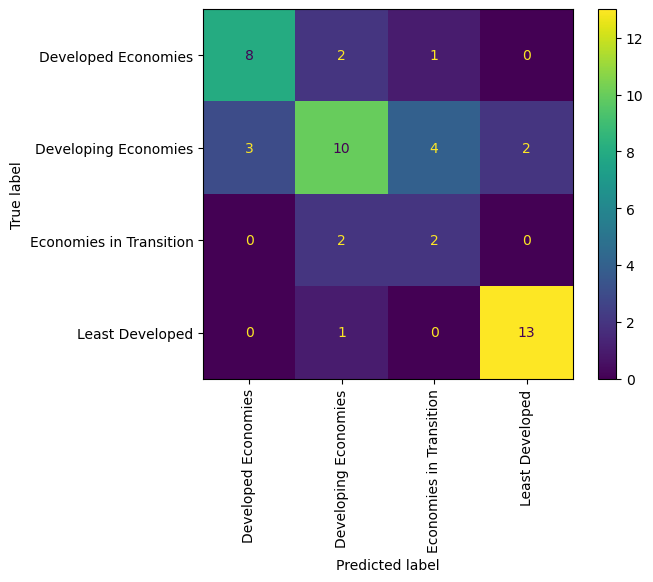

In [103]:
cm_xgb = confusion_matrix(y_test, xgb_predictions, labels=xgb.classes_)
cm_xgb_matrix = ConfusionMatrixDisplay(confusion_matrix=cm_xgb,display_labels=encoder_name_mapping)
cm_xgb_matrix.plot(xticks_rotation='vertical');

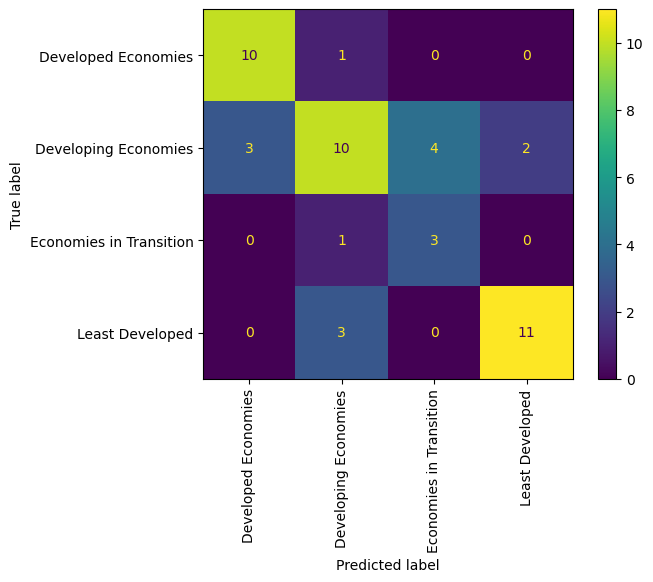

In [104]:
cm_lgb = confusion_matrix(y_test, lgb_predictions, labels=lgb.classes_)
cm_lgb_matrix = ConfusionMatrixDisplay(confusion_matrix=cm_lgb,display_labels=encoder_name_mapping)
cm_lgb_matrix.plot(xticks_rotation='vertical');

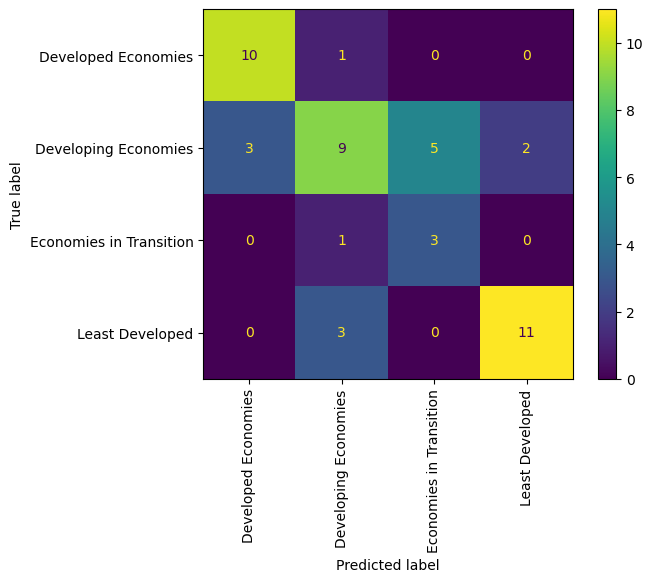

In [106]:
cm_gbc = confusion_matrix(y_test, gbc_predictions, labels=gbc.classes_)
cm_gbc_matrix = ConfusionMatrixDisplay(confusion_matrix=cm_gbc,display_labels=encoder_name_mapping)
cm_gbc_matrix.plot(xticks_rotation='vertical');

# Unsupervised

In [ ]:
# Prepare data for unsupervised training
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled = scaler.fit_transform(X)

In [52]:
# Try the same thing with 3 clusters
hc = AgglomerativeClustering(n_clusters = 4)
hc.fit(scaled)
# Save the cluster lables to the dataframe 
cleaned['cluster'] = hc.labels_

In [53]:
# Visualize data
def plot_cluster(df, plt, feature1, feature2):
    plt.scatter(df[feature1], df[feature2], label= 'Data Points', c = df['cluster'])
    # plt.scatter(centers[feature1],centers[feature2],label= 'Clusters', c='red')
    plt.set_title(f'{feature1[:20]} vs {feature2[:20]}')

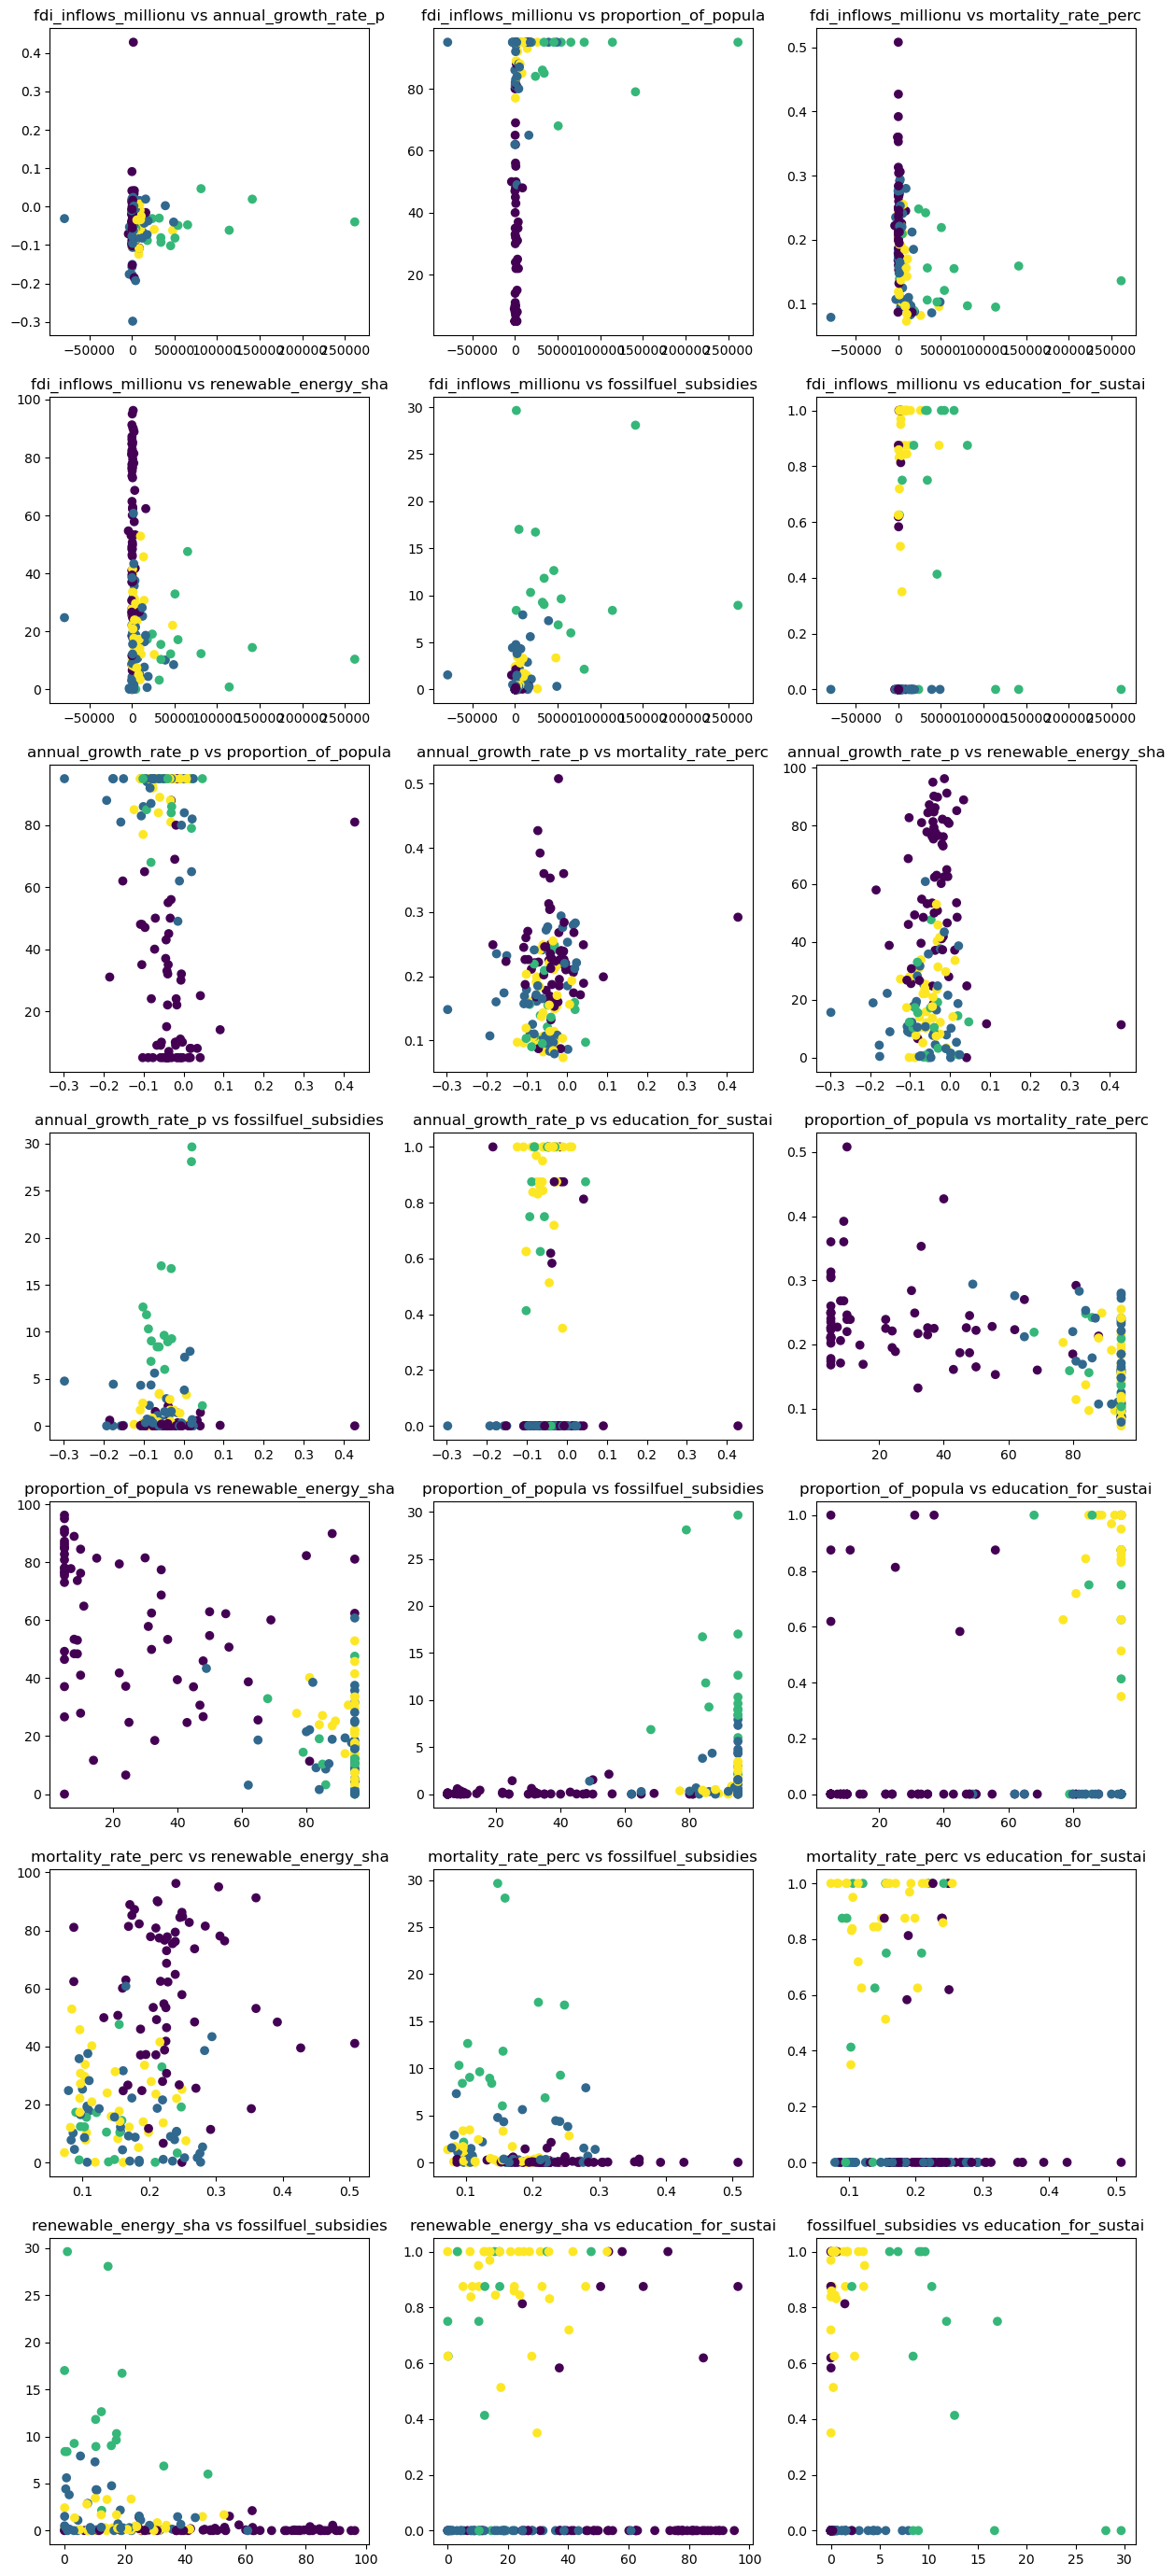

In [54]:
import itertools
# Visualize means 
fig, axes = plt.subplots(7,3, figsize = (15, 35))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
pairs = list(itertools.combinations(cleaned.columns[:-2], 2))
for i, pair in enumerate(pairs):
    plot_cluster(cleaned, axes[i],pair[0],pair[1])

In [56]:
from sklearn.decomposition import PCA

In [61]:
# Instantiate, fit & transform data using PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(scaled)

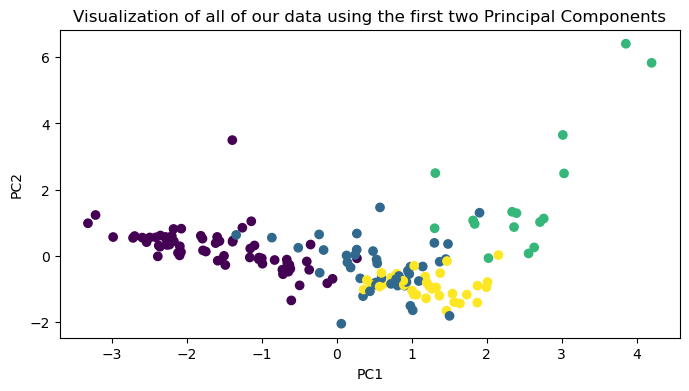

In [64]:
# Visualize the first 2 PCs
plt.figure(figsize = (8, 4))
plt.scatter(pcs[:,0], pcs[:,1], c = hc.labels_)
plt.title('Visualization of all of our data using the first two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2');